In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#in 2015 the fandango website was selling movie tickets and reviewing the movies at the same time. 
#there was a lot of complaints about their reviews
#This analysis is to check if there is a conflict of interest in their rating. 
#And compare their rating with other sites.

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe

<bound method NDFrame.describe of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

In [6]:
#showing the relationship in various columns
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


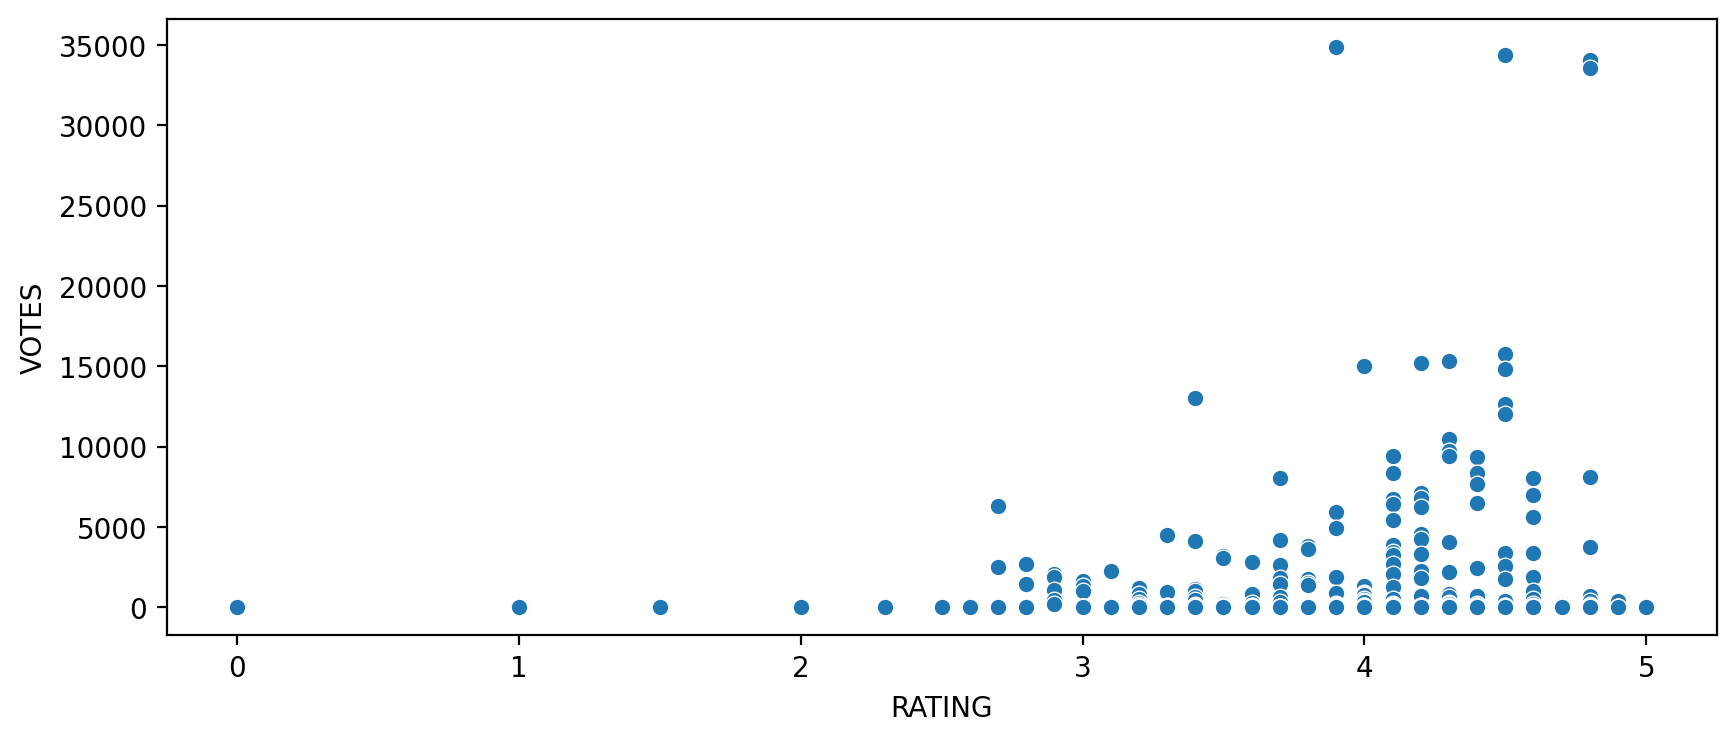

In [7]:
#exploring the relationship between popularity of a film and its rating
#scatterplot showing the relationship between rating and votes

plt.figure(figsize=(10,4) , dpi = 200)

sns.scatterplot( data = fandango, x="RATING" , y ="VOTES");

In [8]:
#The sring column does not allow us to do the data correlation
#therefore i drop the film column so as to do the correlation
fandango_numbers = fandango.drop(['FILM'] , axis = 1)

In [9]:
fandango_numbers.corr() 

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [11]:
#creating a new column 'YEAR' that strips the year;e.g (2015) from the movie names

fandango['YEAR'] = fandango['FILM'].apply( lambda title:title.split('(')[-1].replace(')',''))

In [12]:
#confirming the presence of the year column
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [13]:
#checking the number of movies per year
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

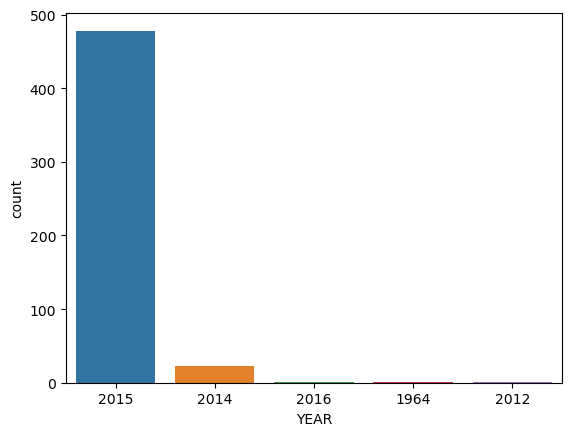

In [14]:
 #visualizing the count of movies per year with a plot
sns.countplot(data = fandango , x = 'YEAR');

In [15]:
# checking the top 10 movies with the highest number of votes
#you can use sort_values or nlargest
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
fandango.sort_values( by = 'VOTES' , ascending = False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [17]:
#checking how many movies have zero votes
len(fandango[fandango['VOTES'] == 0])

69

In [18]:
#creating a dataframe of only reviewed movies
#i.e filter out rows with zero votes
fandango_reviewed =fandango[fandango['VOTES'] > 0]

In [19]:
fandango_reviewed 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


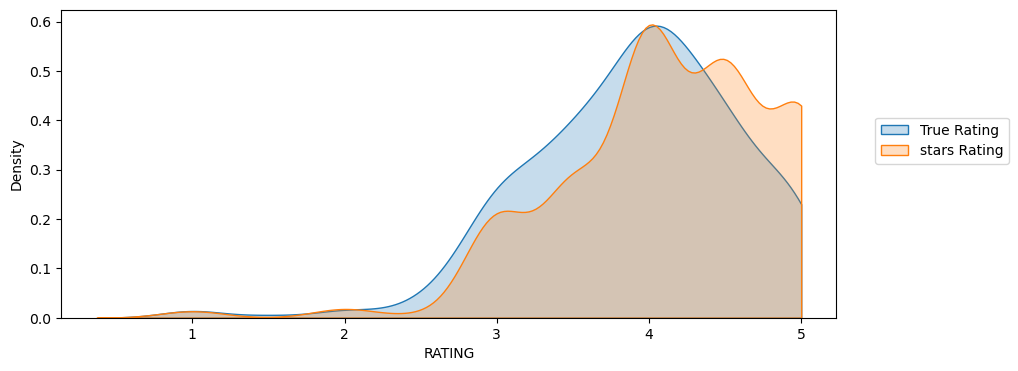

In [20]:
#visualizing the difference between the true numerical rating and star rating
plt.figure(figsize= (10,4))
sns.kdeplot( data = fandango_reviewed , x ='RATING',clip = [0,5], fill = True , label = 'True Rating' )
sns.kdeplot( data = fandango_reviewed , x ='STARS' , clip = [0,5], fill = True , label = 'stars Rating')

plt.legend( loc = (1.05,0.5))

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


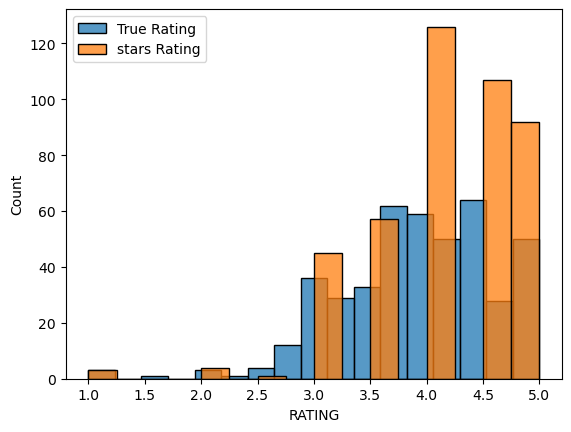

In [21]:
sns.histplot( data = fandango_reviewed , x ='RATING', fill = True , label = 'True Rating' )
sns.histplot( data = fandango_reviewed , x ='STARS' ,  fill = True , label = 'stars Rating')
plt.legend()

In [22]:
#to quantify the difference bewteen the the stars and rating
#create a new column showing their difference 

fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS'] - fandango_reviewed['RATING']


C:\Users\MINIONS\AppData\Local\Temp\ipykernel_9004\278429653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS'] - fandango_reviewed['RATING']


In [23]:
fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS_DIFF'].round(2)

C:\Users\MINIONS\AppData\Local\Temp\ipykernel_9004\2297159856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS_DIFF'].round(2)


In [24]:
 fandango_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

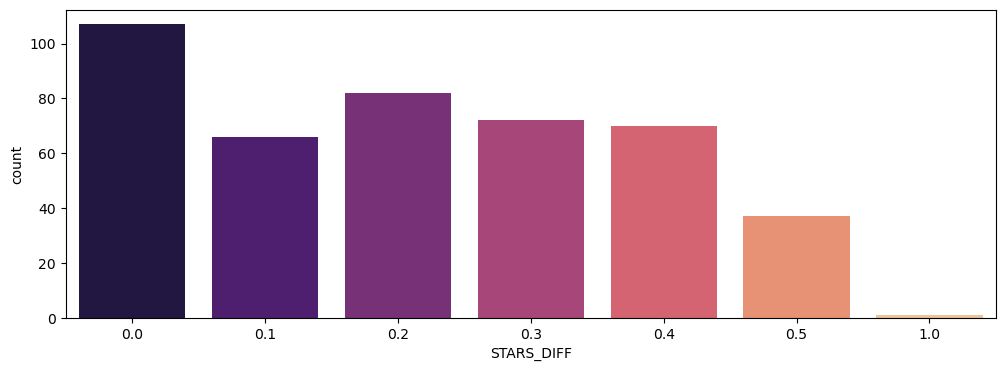

In [25]:
#creating a countplot to visualize the number of times a difference occurs
plt.figure (figsize = (12,4))
sns.countplot (data = fandango_reviewed, x = 'STARS_DIFF' , palette = 'magma')

In [26]:
# from above, we can see that one movie was displaying over 1 star difference
#lets check it out!
fandango_reviewed[fandango_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [27]:
 #comparing fanadago ratings to others sites that perform movie rating  

In [28]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [29]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [30]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [31]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

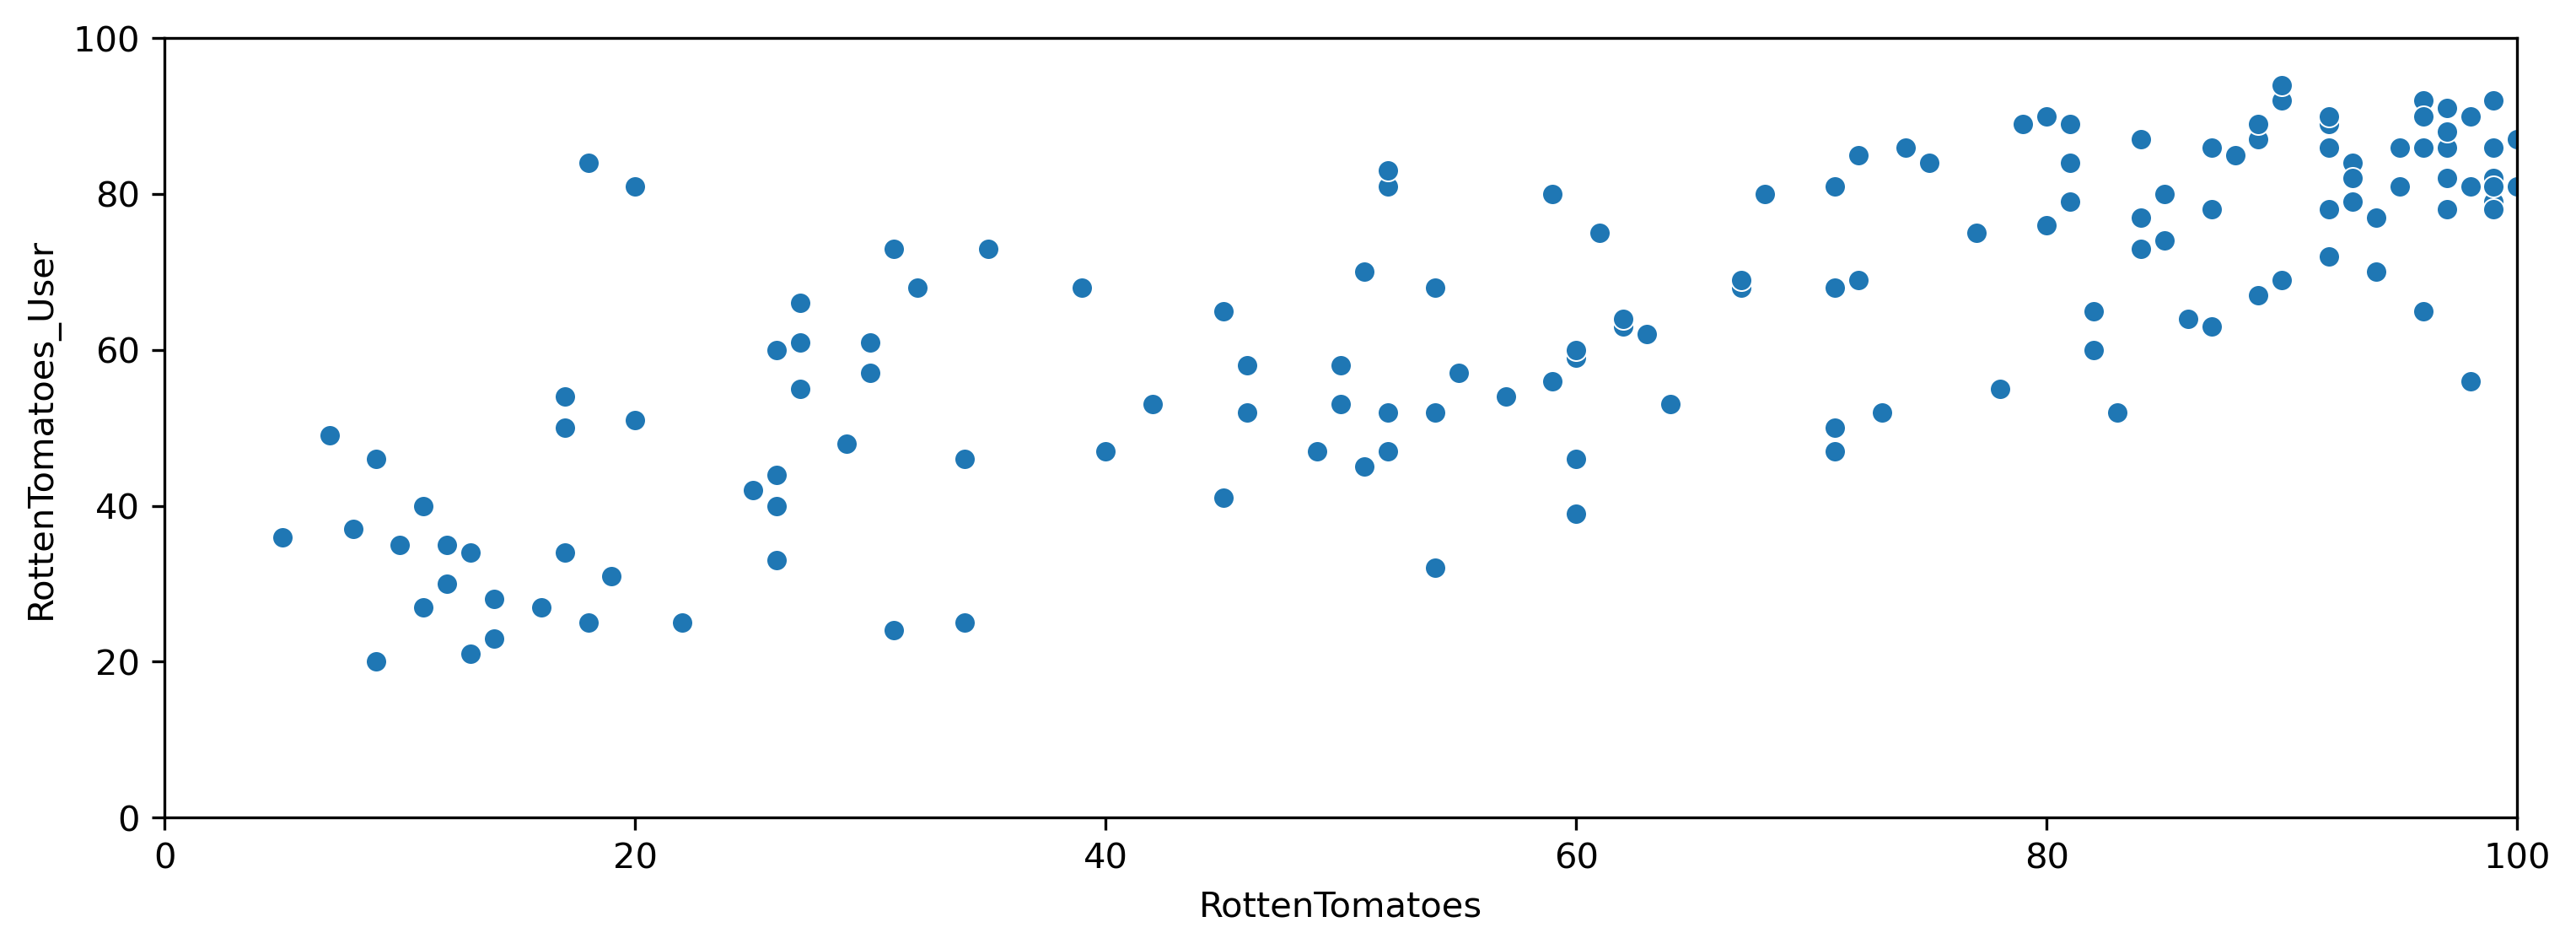

In [32]:
#Rotten tomatoes; there is the critic review and roten tomatoes user review
#a scatterplot exploring the relationship between the reviews
plt.figure(figsize=(12,4) , dpi = 300)
sns.scatterplot( data = all_sites,x = 'RottenTomatoes', y ='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [33]:
#quantifying the difference between critics and RT use ratings
# calculating the difference between the values
all_sites ['Rotten_diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [34]:
all_sites ['Rotten_diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_diff, Length: 146, dtype: int64

In [35]:
#taking the absolute value of the differences then calclating the mean
all_sites ['Rotten_diff'].apply(abs).mean()

15.095890410958905

In [36]:
#plotting the difference
#first is the actual values of the difference
#second plot is for the absolute values

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rotten_diff', ylabel='Count'>

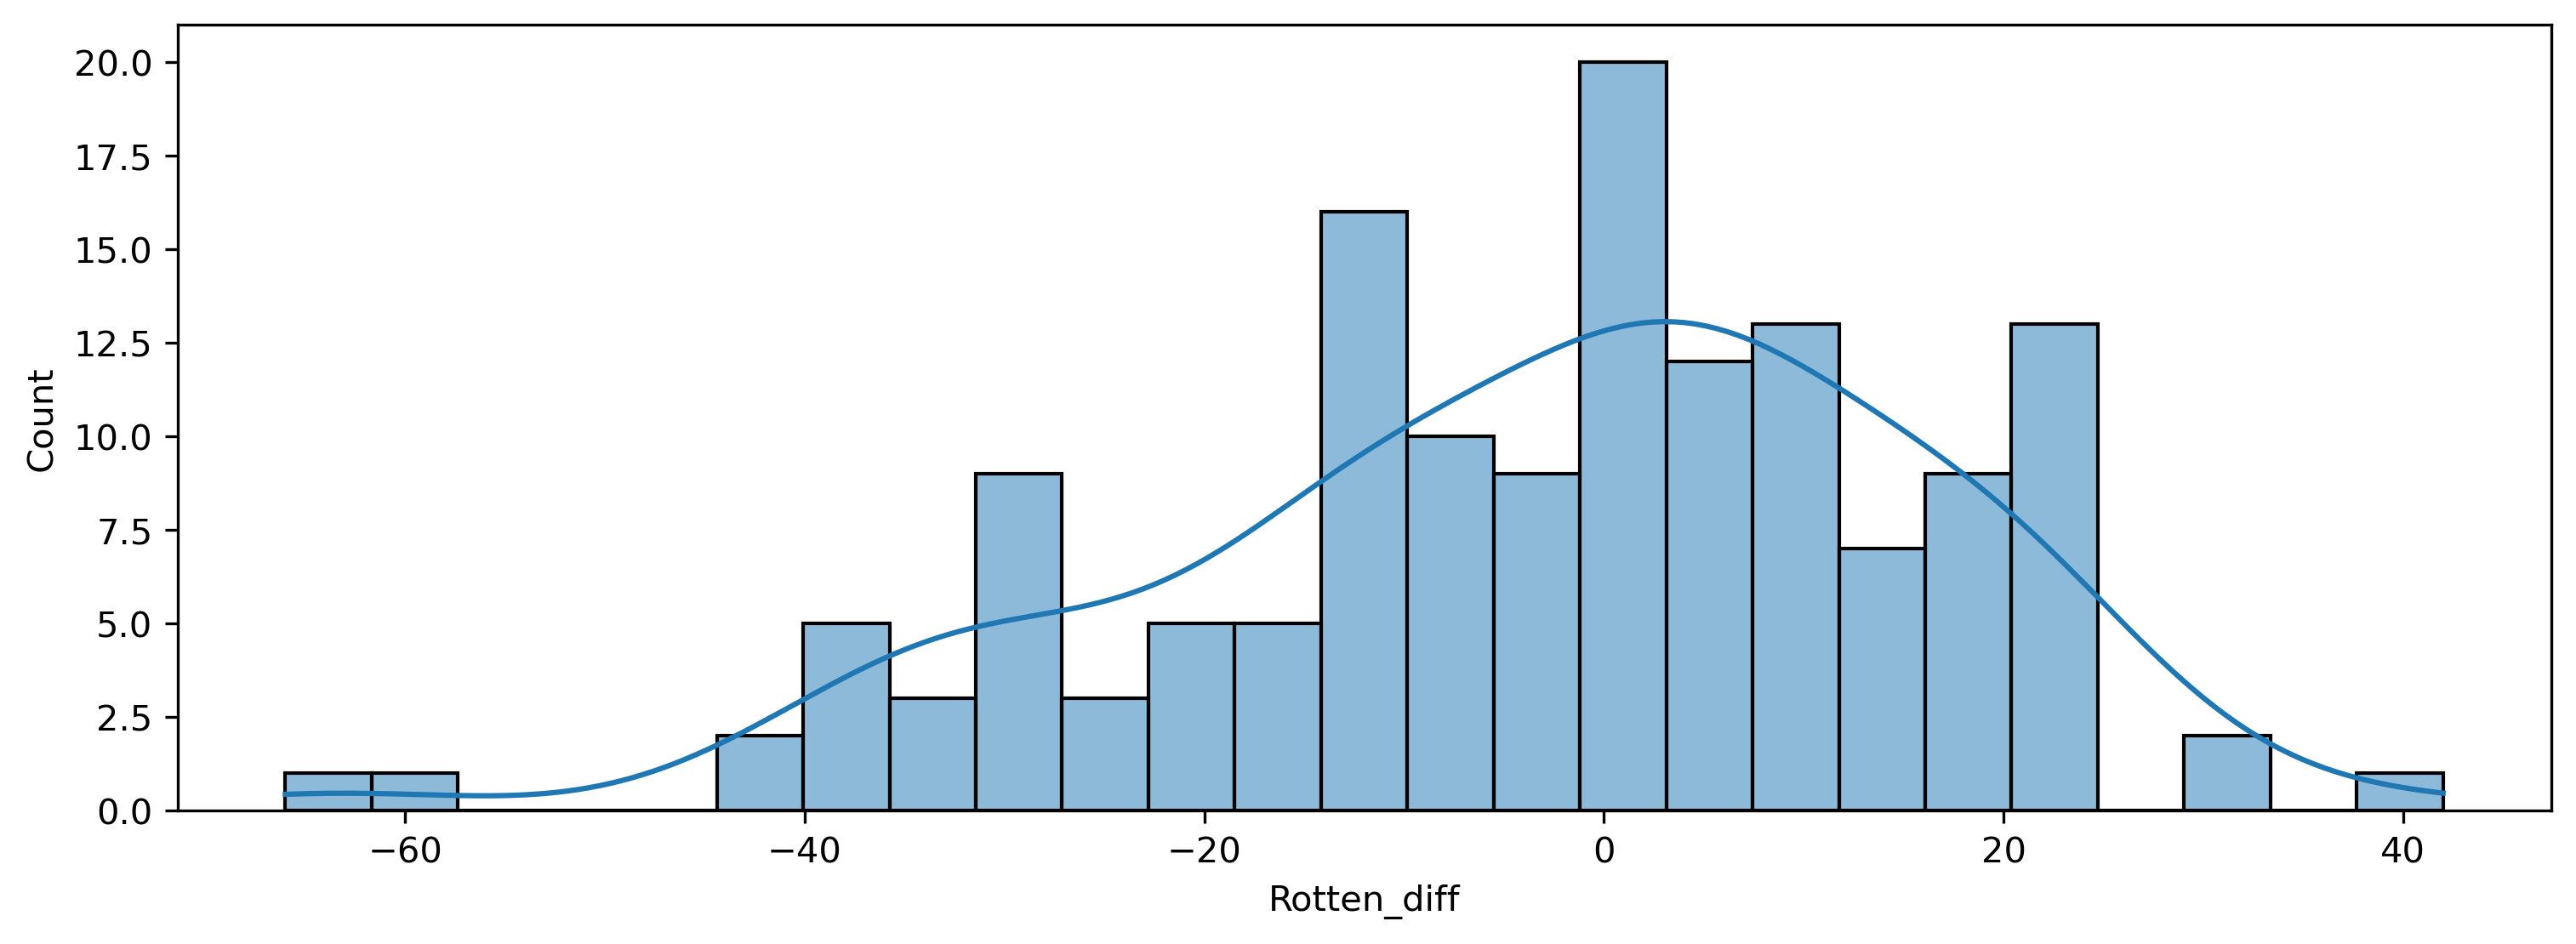

In [37]:
plt.figure(figsize=(12,4) , dpi = 300)
sns.histplot( data = all_sites, x ='Rotten_diff', kde = True , bins = 25)

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rotten_diff', ylabel='Count'>

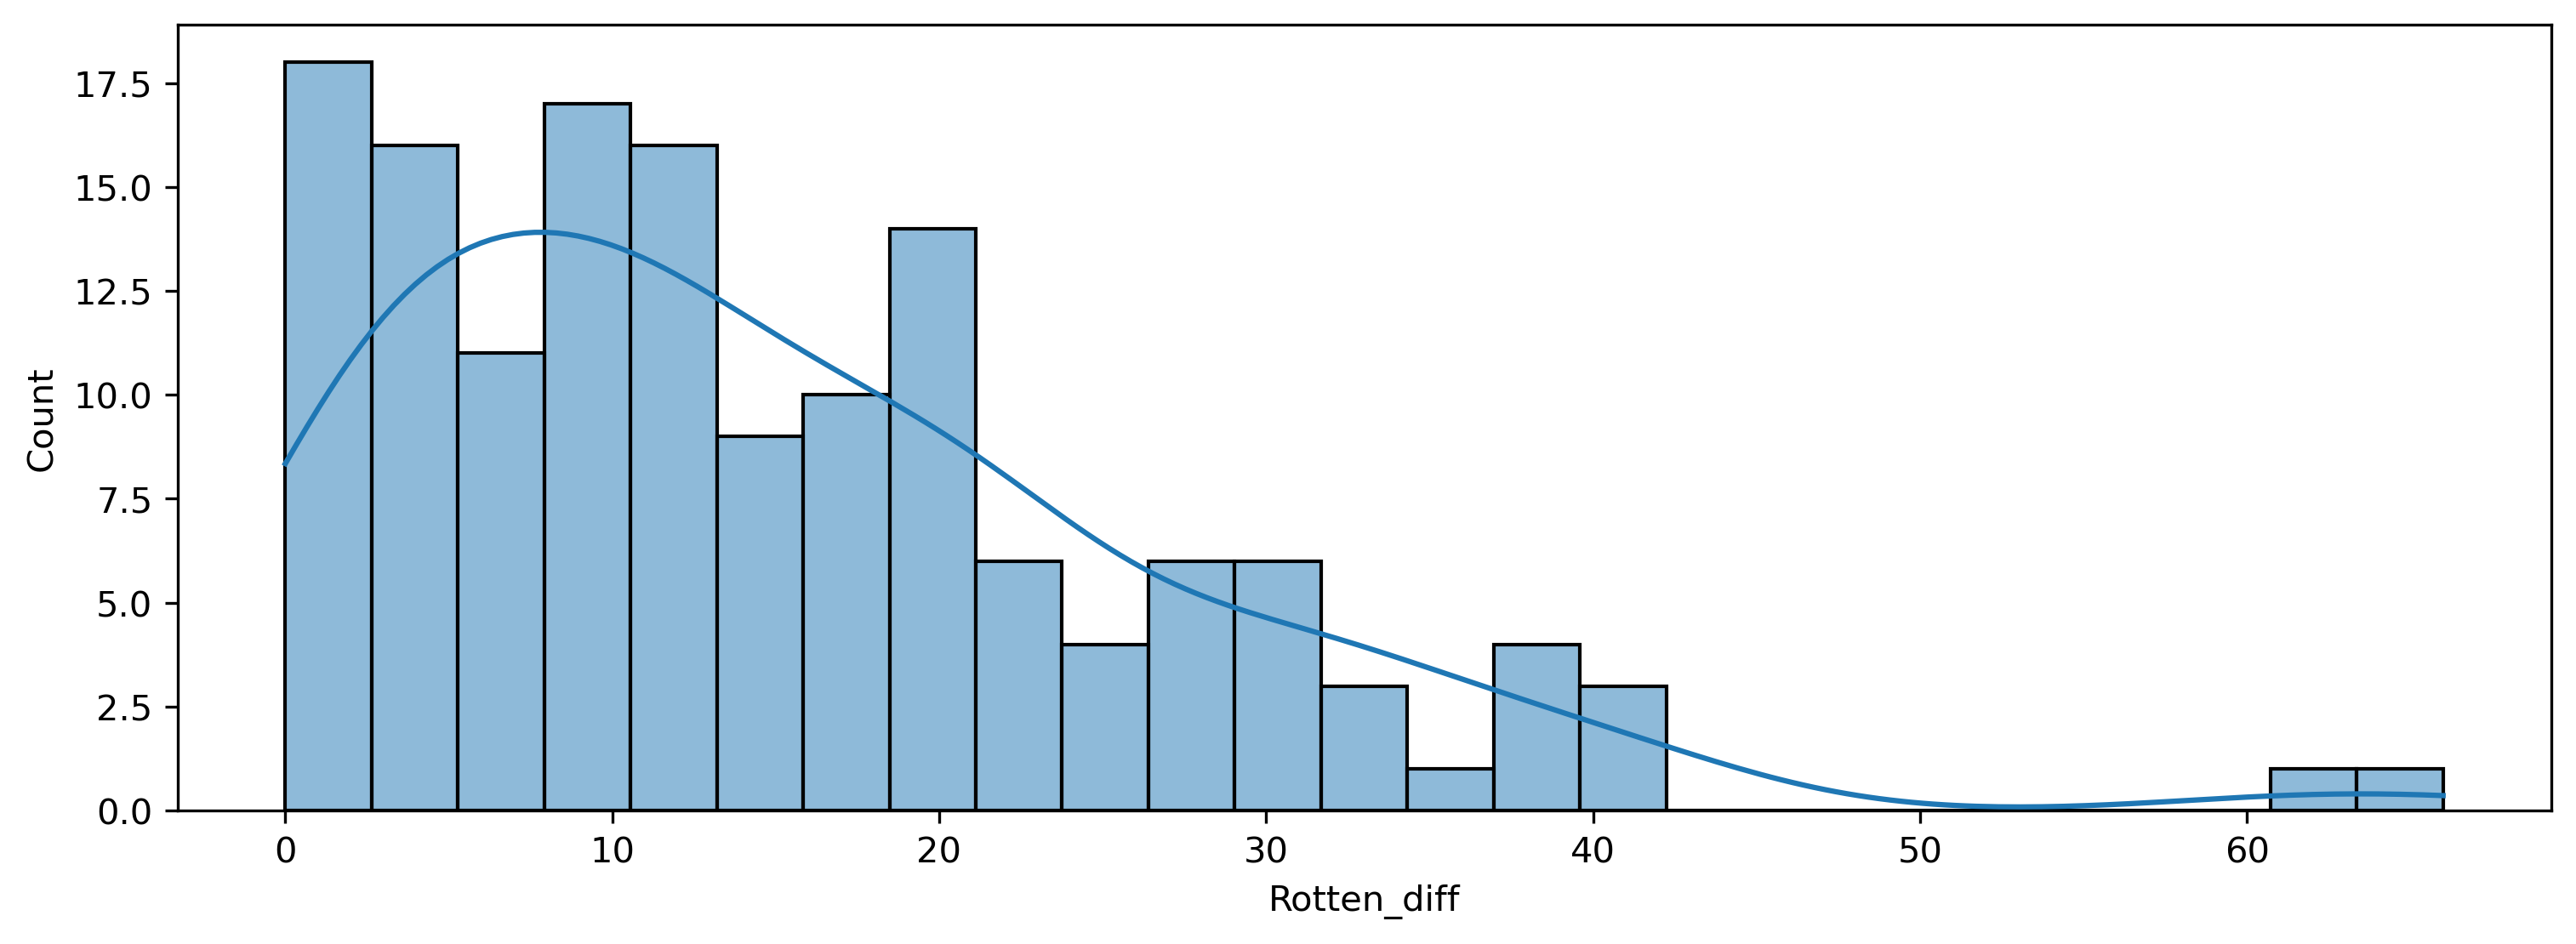

In [38]:
plt.figure(figsize=(12,4) , dpi = 300)
sns.histplot( x =all_sites ['Rotten_diff'].apply(abs), kde = True , bins = 25)

In [39]:
#checking the movies that are ausing the largest differences
#top five movies users rated higher than critics on avg
all_sites.nsmallest(5,  'Rotten_diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [40]:
all_sites.nlargest(5,  'Rotten_diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

In [41]:
#lets analyse metacritic

(0.0, 10.0)

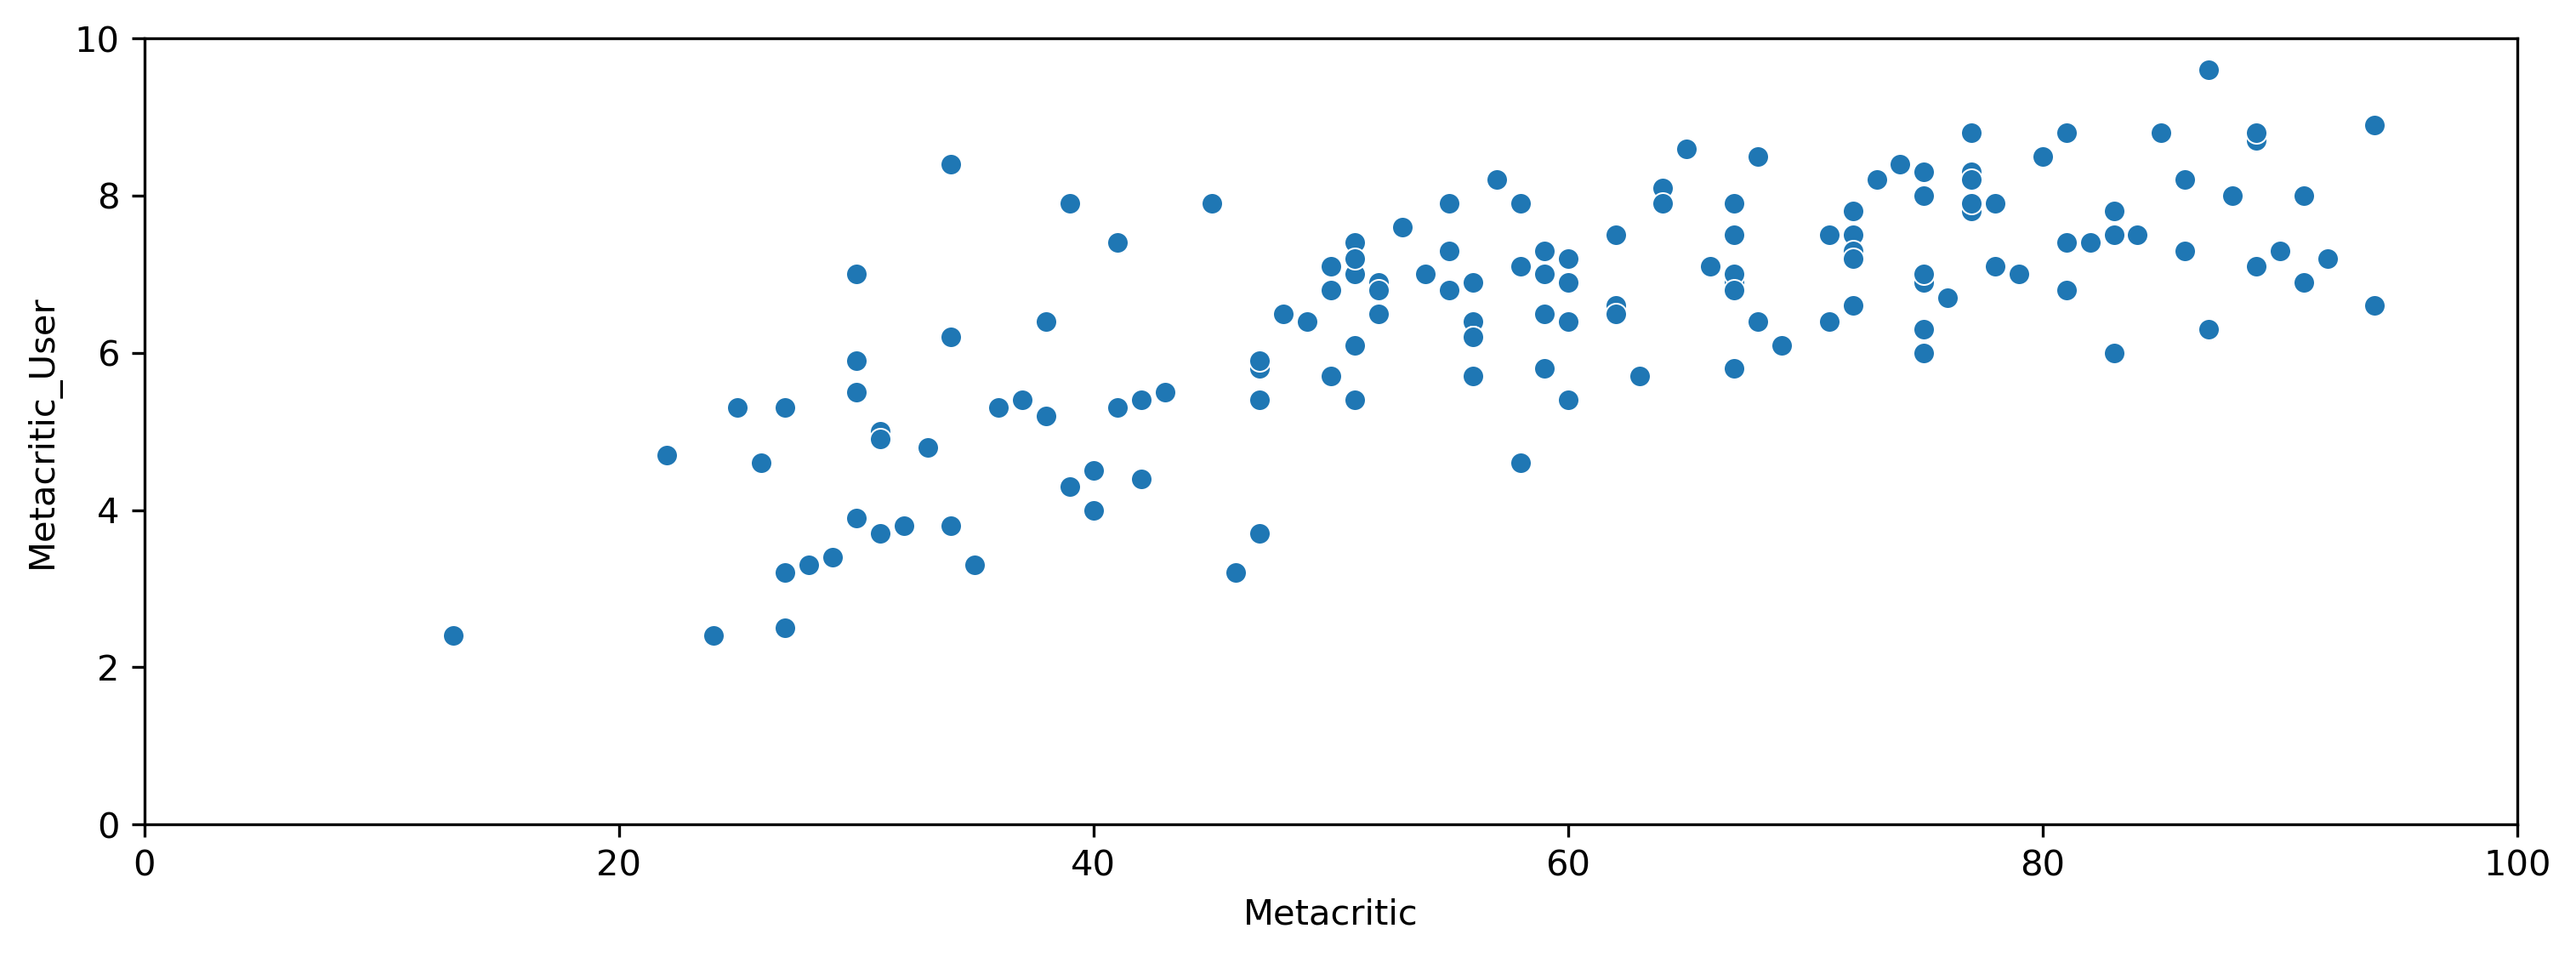

In [42]:
plt.figure(figsize=(12,4) , dpi = 300)
sns.scatterplot( data = all_sites,x = 'Metacritic', y ='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

In [43]:
#lets analyse IMDB and metacritic votecount

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

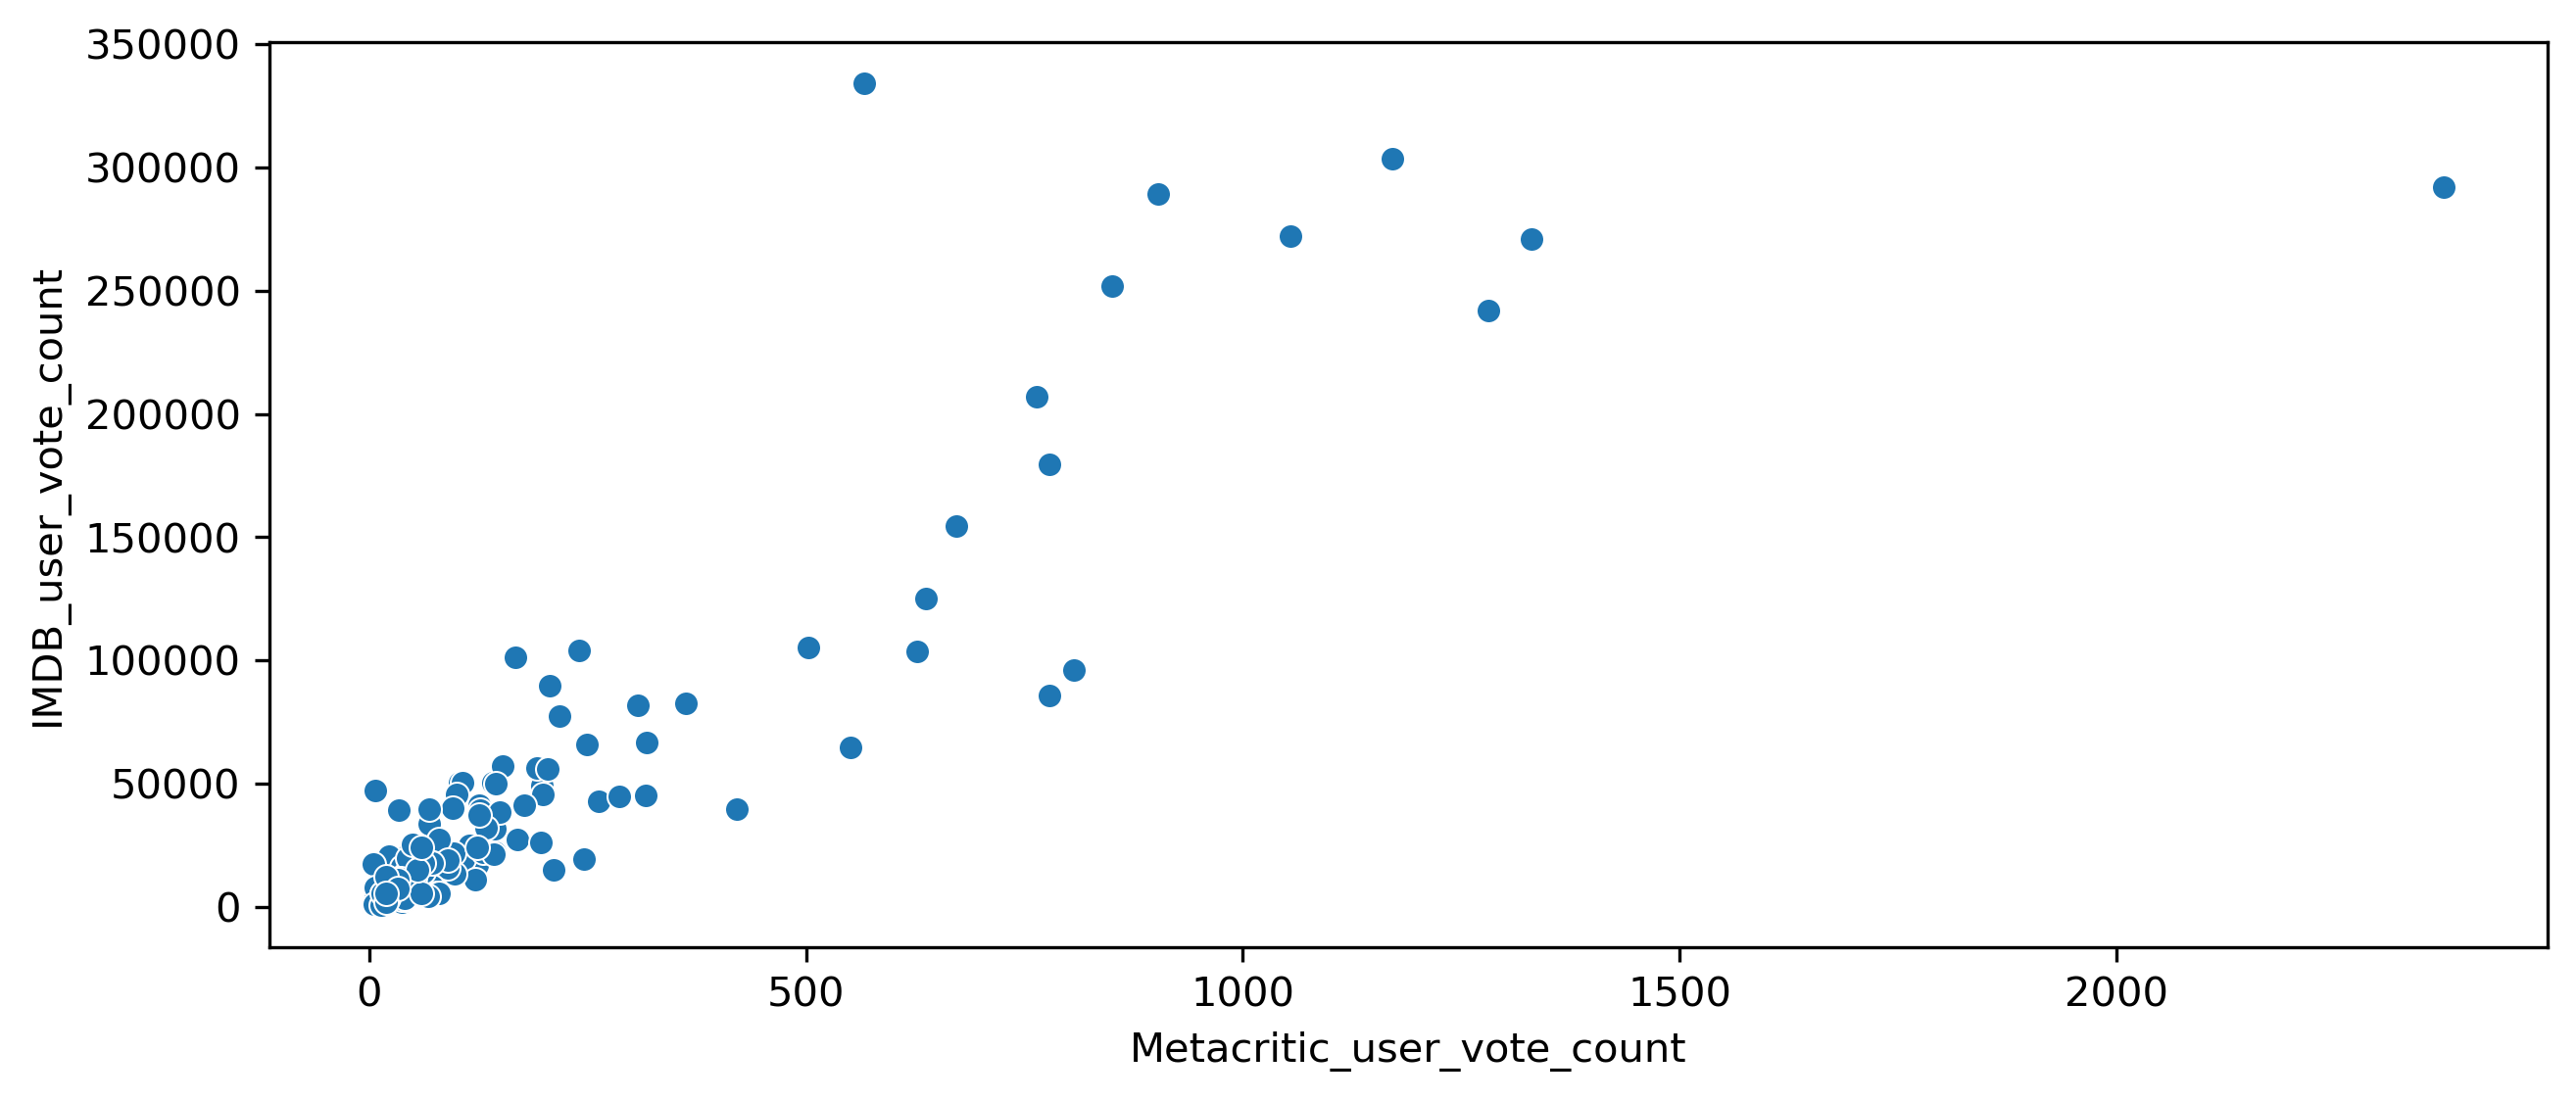

In [44]:
plt.figure(figsize=(10,4) , dpi = 300)
sns.scatterplot( data = all_sites,x = 'Metacritic_user_vote_count', y ='IMDB_user_vote_count')


In [45]:
#we have two oulier points one which indicates there was a very high metacritic and IMDB user vote count
# the other one indicates that the movie which had the highest vote count on IMDB had only 500 metacritic ratings


In [46]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [47]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [48]:
#fandango vs all sites
#this part answers aour analysis question....
#is fandango rating movies higher than the actual movie rating considering   that they actually sell tickets

In [49]:
# the fandango data contains more movies than the other sites that i have reviewed
# i need to make the movies to be the same so as to create a basis for comparison

In [50]:
#creting a new data frame of the merged data

df = pd.merge(fandango,all_sites, on = 'FILM' , how = 'inner')

In [51]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [53]:
 #fandango uses rating between 0 - 5 
# normalizing the all the ratings to fit into the range

In [54]:
#checking the range (max values) of each column
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_diff                       42.0
Name: max, dtype: float64

In [55]:
import numpy as np
df['RT_norm']= np.round(df['RottenTomatoes']/20,1)
df['RTU_norm']= np.round(df['RottenTomatoes_User']/20,1)

In [56]:
df['Meta_norm']= np.round(df['Metacritic']/20,1)
df['MetaUs_norm']= np.round(df['Metacritic_User']/2 ,1)

In [57]:
df['IMDB_norm']= np.round(df['IMDB']/2,1)


In [58]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,RT_norm,RTU_norm,Meta_norm,MetaUs_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [59]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_diff',
       'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaUs_norm', 'IMDB_norm'],
      dtype='object')

In [60]:
 #creating a norm_scores dataframe that contains the normalized ratings only
norm_scores = df[[ 'STARS', 'RATING', 'RT_norm','RTU_norm', 'Meta_norm','MetaUs_norm', 'IMDB_norm' ]]

In [61]:
norm_scores.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaUs_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

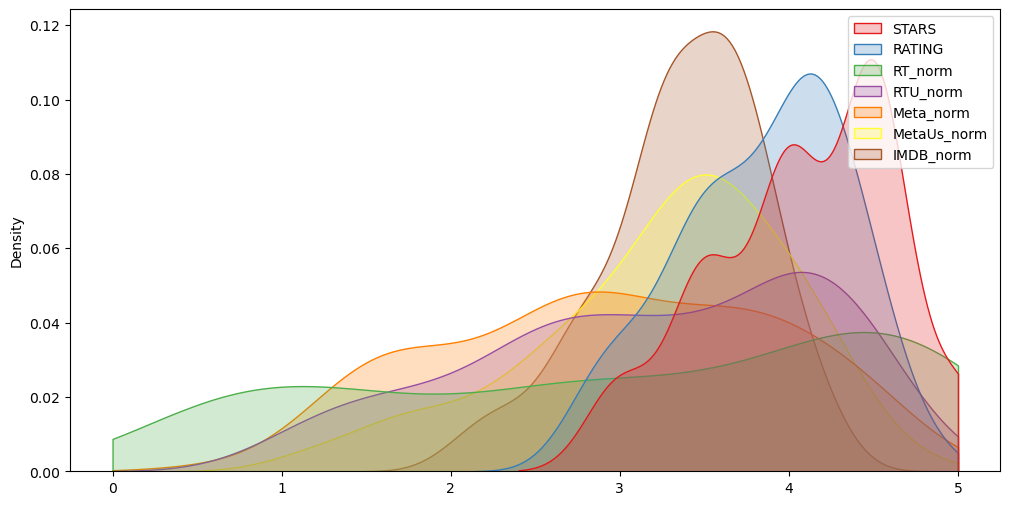

In [206]:
plt.figure (figsize = (12,6))
sns.kdeplot(data = norm_scores , clip = [0,5] , fill = True , palette = 'Set1')



C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

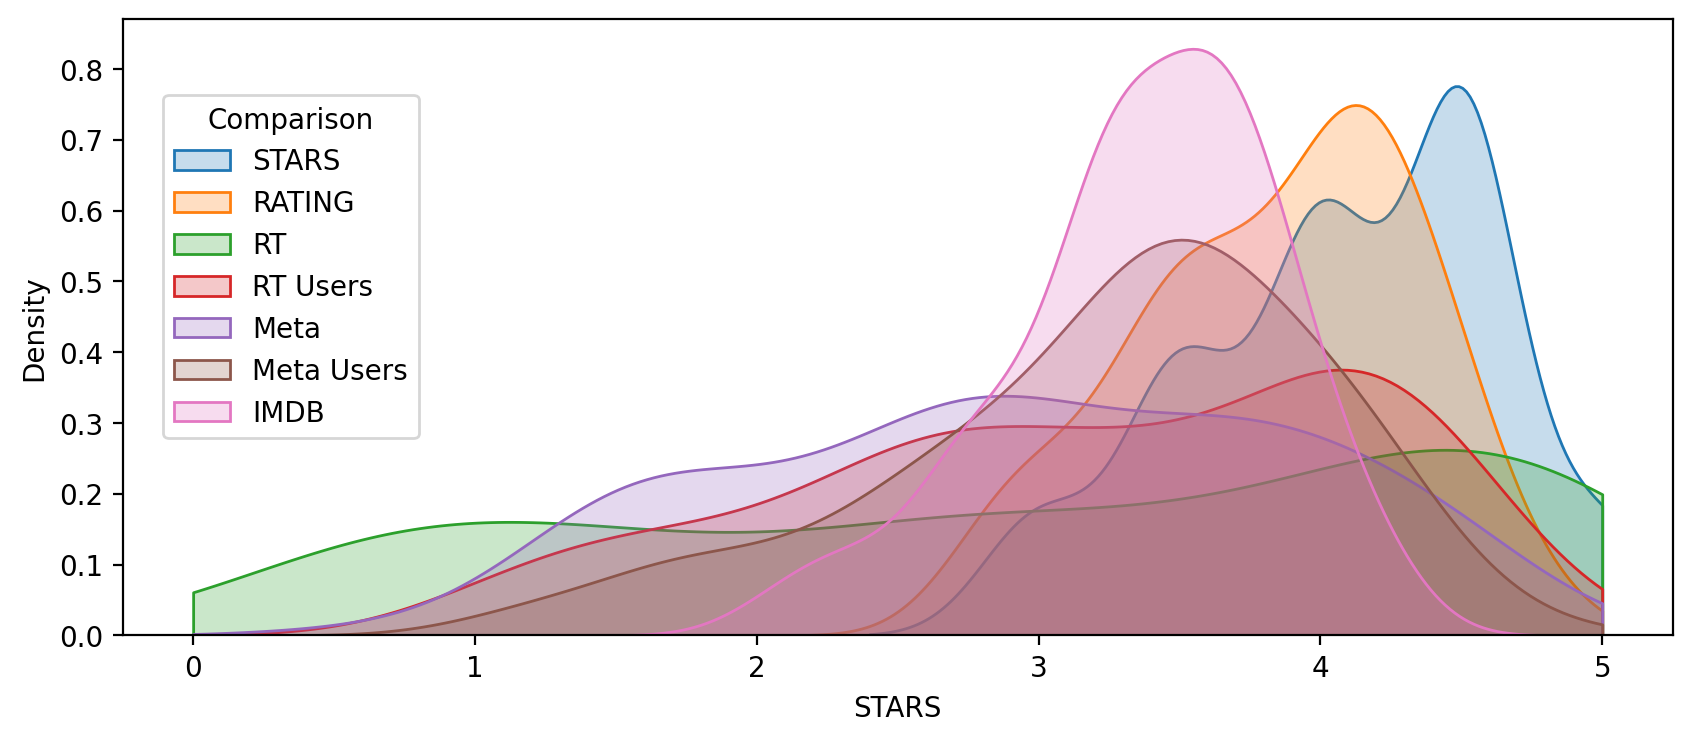

In [144]:
#comparing the fandangos rating and other sites rating using a plot
plt.figure(figsize = (10,4), dpi = 200)

sns.kdeplot( data = norm_scores , x = 'STARS' , clip = [0,5], fill = True, label = 'STARS')
sns.kdeplot( data = norm_scores , x = 'RATING' , clip = [0,5], fill = True, label = 'RATING')
sns.kdeplot( data = norm_scores , x = 'RT_norm' , clip = [0,5], fill = True , label = 'RT')
sns.kdeplot( data = norm_scores , x = 'RTU_norm' , clip = [0,5], fill = True , label = 'RT Users')
sns.kdeplot( data = norm_scores , x = 'Meta_norm' , clip = [0,5], fill = True , label = 'Meta')
sns.kdeplot( data = norm_scores , x = 'MetaUs_norm' , clip = [0,5], fill = True , label = 'Meta Users')
sns.kdeplot( data = norm_scores , x = 'IMDB_norm' , clip = [0,5], fill = True , label = 'IMDB')

plt.legend( bbox_to_anchor=(0.2,0.9) , title = "Comparison")

C:\Users\MINIONS\AppData\Local\Temp\ipykernel_9004\2976783206.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=norm_scores, x=col, clip=[0, 5], fill=True, label=label , palette = 'Set2')
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\AppData\Local\Temp\ipykernel_9004\2976783206.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=norm_scores, x=col, clip=[0, 5], fill=True, label=label , palette = 'Set2')
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

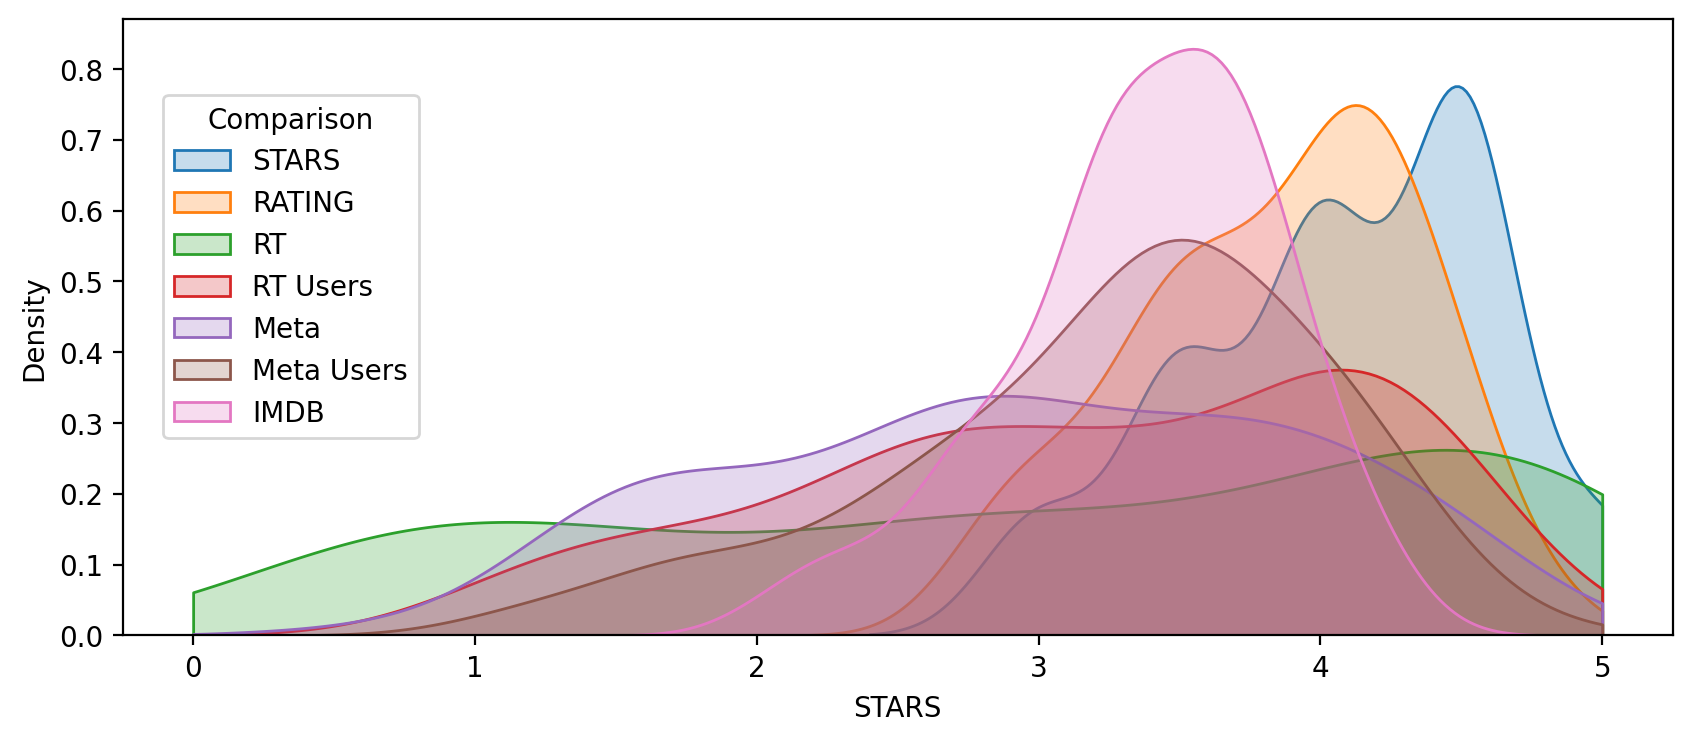

In [152]:
plt.figure(figsize=(10, 4), dpi=200)

columns = ['STARS', 'RATING', 'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaUs_norm', 'IMDB_norm']
labels = ['STARS', 'RATING', 'RT', 'RT Users', 'Meta', 'Meta Users', 'IMDB']

for col, label in zip(columns, labels):
    sns.kdeplot(data=norm_scores, x=col, clip=[0, 5], fill=True, label=label , palette = 'Set2')

plt.legend(bbox_to_anchor=(0.2, 0.9), title="Comparison")

In [ ]:
#it is observed that the Fandango site has the highest movie ratings as compared to other movie rating sites

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


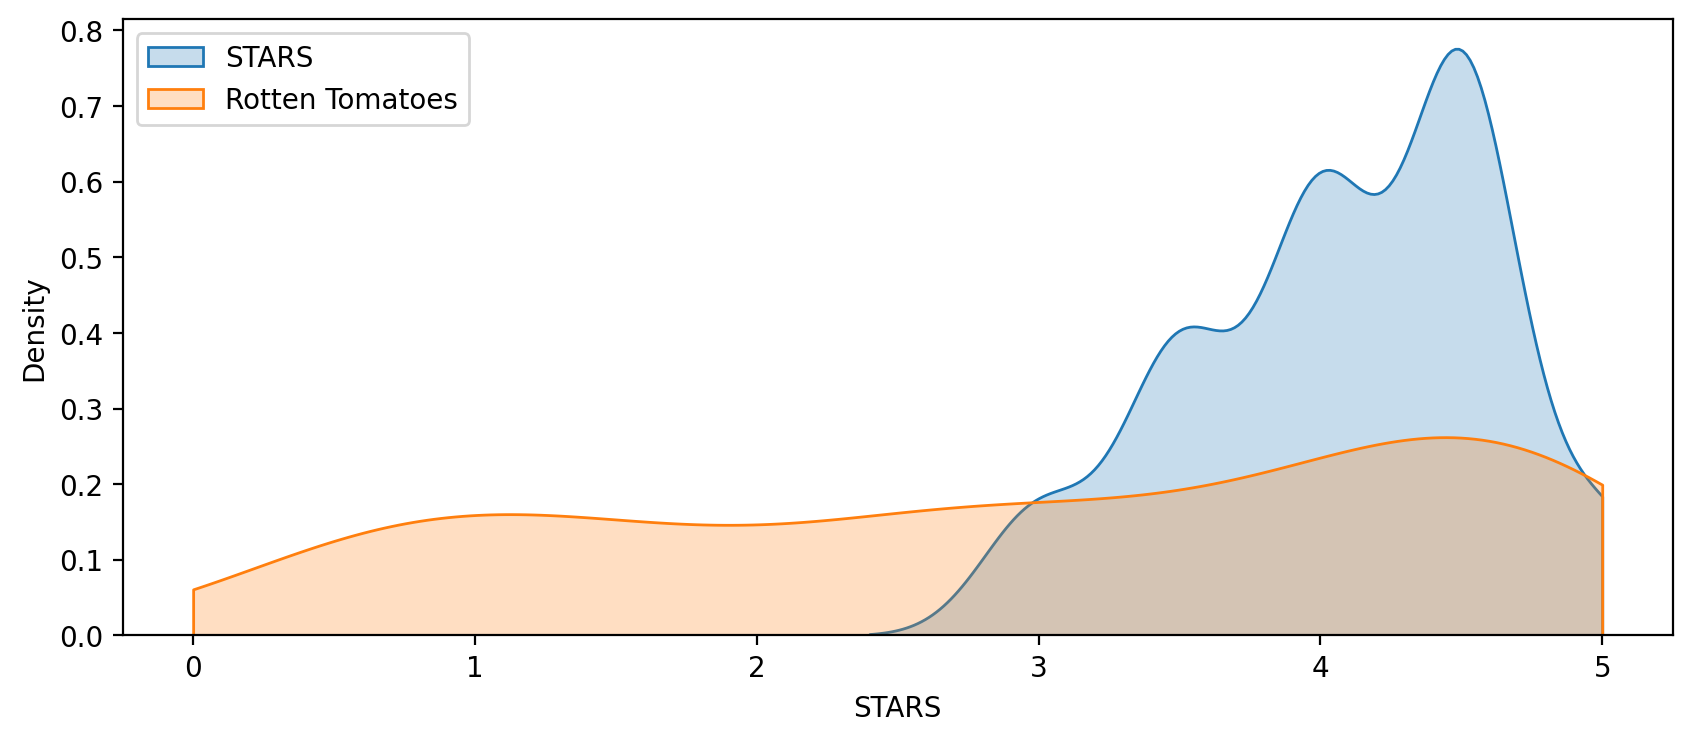

In [170]:
#comparison between the fandango star ratings and rotten tomatoes user ratings
plt.figure(figsize = (10,4), dpi = 200)

sns.kdeplot( data = norm_scores , x = 'STARS' , clip = [0,5], fill = True, label = 'STARS')
sns.kdeplot( data = norm_scores , x = 'RT_norm' , clip = [0,5], fill = True, label = 'Rotten Tomatoes')

plt.legend(loc ='upper left')


In [ ]:
#from above observation, it is clear that the fandango ratings are way high as comparred to Rotten Tomatoes user ratings

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

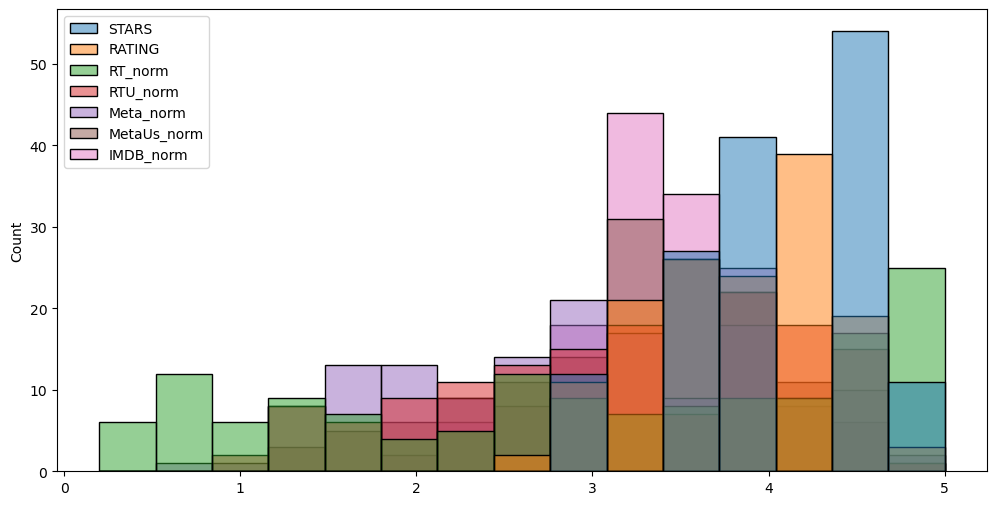

In [182]:
# visualizing the data using histogram
plt.figure (figsize = (12, 6))
sns.histplot ( data = norm_scores, bins = 15)

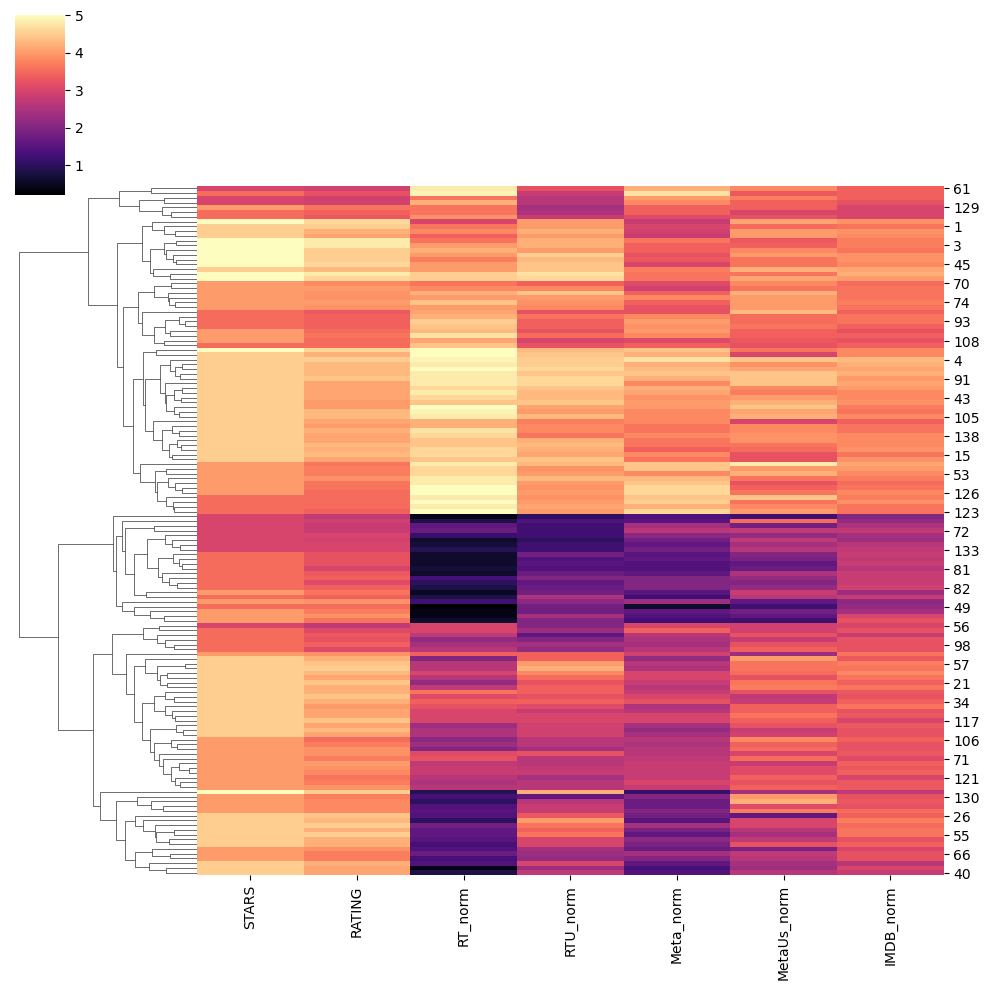

In [186]:
#checking how the worst movies across all platforms are rated
sns.clustermap(norm_scores,cmap = 'magma' , col_cluster = False)

In [ ]:
 #clearly fandango is rating movies higher than other sites

In [188]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaUs_norm',
       'IMDB_norm'],
      dtype='object')

In [190]:
norm_films = df [['FILM','STARS', 'RATING', 'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaUs_norm',
       'IMDB_norm']]

In [194]:
#checking the worst rated movies
worst_films = norm_films.nsmallest(10,'RT_norm')

C:\Users\MINIONS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

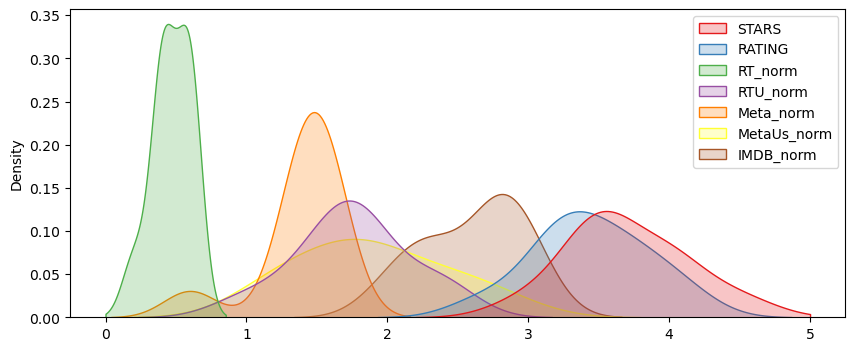

In [212]:
plt.figure (figsize =(10,4))
sns.kdeplot( data = worst_films , clip = [0,5], fill = True , palette = 'Set1')

In [214]:
worst_films

,FILM,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaUs_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
